<a href="https://colab.research.google.com/github/emcgeever-husky/Econ3916/blob/main/Assignemnt_2/Assignemnt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
## Phase 1: The Robustness Audit
### 1.1 -- Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])
# print(latency_logs) -- check

### 1.2 --
def calculate_mad(data):
    # 1. Calculate the Median of the data
    median = np.median(data)
    # 2. Calculate Absolute Deviations (|x - median|)
    absolute_deviations = np.abs(data - median)
    # 3. Return the Median of those deviations
    return np.median(absolute_deviations)

In [56]:
### 1.3 Analysis (Why Compare the Standard Deviation (SD) vs. MAD. Explain why the SD is "exploded" by the 20 outliers while the MAD remains stable.)

print(f"Median : {np.median(latency_logs):.2f}")
print(f"Mean   : {np.mean(latency_logs):.2f}")
print(f"Standard Deviation  : {np.std(latency_logs):.2f}")
print(f"MAD : {calculate_mad(latency_logs):.2f}")

Median : 35.00
Mean   : 90.80
Standard Deviation  : 419.63
MAD : 8.00


The mean and median show the damage of the large tails, removing those gives us a much more accurate value to the whole of the data, but including them in the mean shows how skewed they lead the data to be.  This is even more true of the MAD and SD, where the massive jump reflects the inflation brought by the outliers.

In [57]:
## Phase 2

### 2.1 -- False positive paradox
def bayesian_audit(prior, sensitivity, specificity):
  # P(flagged given cheater) * P(cheater)
  true_positive  = sensitivity * prior
  # P(flagged given innocent) * P(innocent)
  false_positive = (1 - specificity) * (1 - prior)
  # P(cheater given flagged)
  posterior = true_positive / (true_positive + false_positive)

  return posterior

scenarios = {
    "Bootcamp": .50,
    "Econ Class": .05,
    "Honors Seminar": 0.001,
  }

for label, prior in scenarios.items():
  p = bayesian_audit(prior, sensitivity=0.98, specificity=0.98)
  print(f"{label}:  P(Cheater given Flagged) = {p:.1%}")

Bootcamp:  P(Cheater given Flagged) = 98.0%
Econ Class:  P(Cheater given Flagged) = 72.1%
Honors Seminar:  P(Cheater given Flagged) = 4.7%


In [58]:
## Phase 3: The Bias Audit
# given obersvations and split it 50.50
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])


chi_square = np.sum((observed - expected)**2 / expected)

#output
print(f"Chi-Square: {chi_square:.2f}")
print(f"Threshold: 3.84 (0.05)")
print(f"SRM detected: {chi_square > 3.84}")

Chi-Square: 2.50
Threshold: 3.84 (0.05)
SRM detected: False


Becuase Chi-Sqaured (2.5) < the Threshold (3.84) we know that the 500 users that are missing is just noise, there is no  need to worry that there is something systematically wrong with the users. No SRM detected, the group just split in a random way.

Total tokens      : 10,000
Survivors (top 1%): 100
Mean cap (all)    : $2,740.84
Mean cap (survivors): $44,633.52


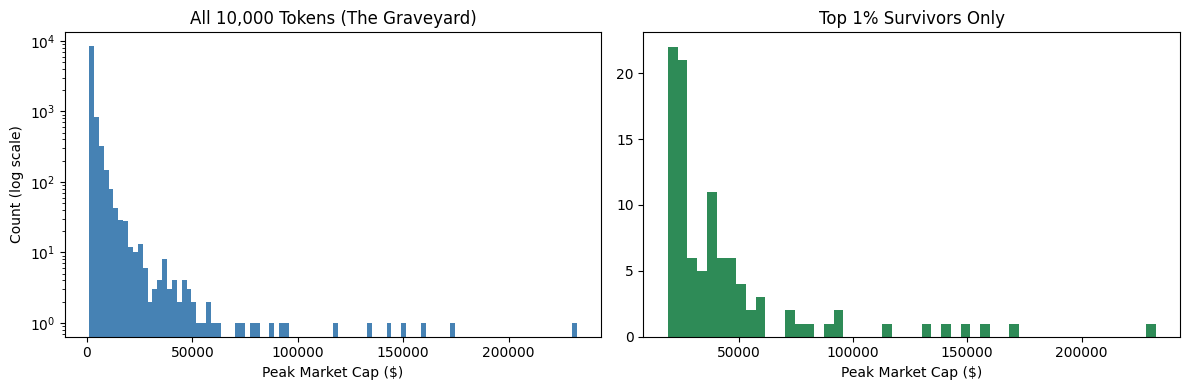

In [59]:
## Phase 4: AI Expansion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate 10,000 token launches with Pareto distribution
peak_market_cap = (np.random.pareto(a=1.5, size=10000) + 1) * 1000  # in $

# All tokens
df_all = pd.DataFrame({"market_cap": peak_market_cap})

# Top 1% survivors only
threshold = np.percentile(peak_market_cap, 99)
df_survivors = df_all[df_all["market_cap"] >= threshold]

# Output
print(f"Total tokens      : {len(df_all):,}")
print(f"Survivors (top 1%): {len(df_survivors):,}")
print(f"Mean cap (all)    : ${df_all['market_cap'].mean():,.2f}")
print(f"Mean cap (survivors): ${df_survivors['market_cap'].mean():,.2f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df_all["market_cap"], bins=100, color="steelblue", log=True)
axes[0].set_title("All 10,000 Tokens (The Graveyard)")
axes[0].set_xlabel("Peak Market Cap ($)")
axes[0].set_ylabel("Count (log scale)")

axes[1].hist(df_survivors["market_cap"], bins=50, color="seagreen")
axes[1].set_title("Top 1% Survivors Only")
axes[1].set_xlabel("Peak Market Cap ($)")

plt.tight_layout()
plt.show()